In [ ]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:

data = {
    "Outlook": ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast",
                "Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp": ["Hot","Hot","Hot","Mild","Cool","Cool","Cool",
             "Mild","Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity": ["High","High","High","High","Normal","Normal","Normal",
                 "High","Normal","Normal","Normal","High","Normal","High"],
    "Wind": ["Weak","Strong","Weak","Weak","Weak","Strong","Strong",
             "Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "PlayTennis": ["No","No","Yes","Yes","Yes","No","Yes",
                   "No","Yes","Yes","Yes","Yes","Yes","No"]
}

df = pd.DataFrame(data)


In [5]:
label_encoders = {}

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [6]:
X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]


In [7]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
sample = pd.DataFrame({
    "Outlook": [label_encoders["Outlook"].transform(["Sunny"])[0]],
    "Temp": [label_encoders["Temp"].transform(["Cool"])[0]],
    "Humidity": [label_encoders["Humidity"].transform(["High"])[0]],
    "Wind": [label_encoders["Wind"].transform(["Strong"])[0]]
})

prediction = model.predict(sample)

print("Prediction (PlayTennis):",
      label_encoders["PlayTennis"].inverse_transform(prediction)[0])


Prediction (PlayTennis): No


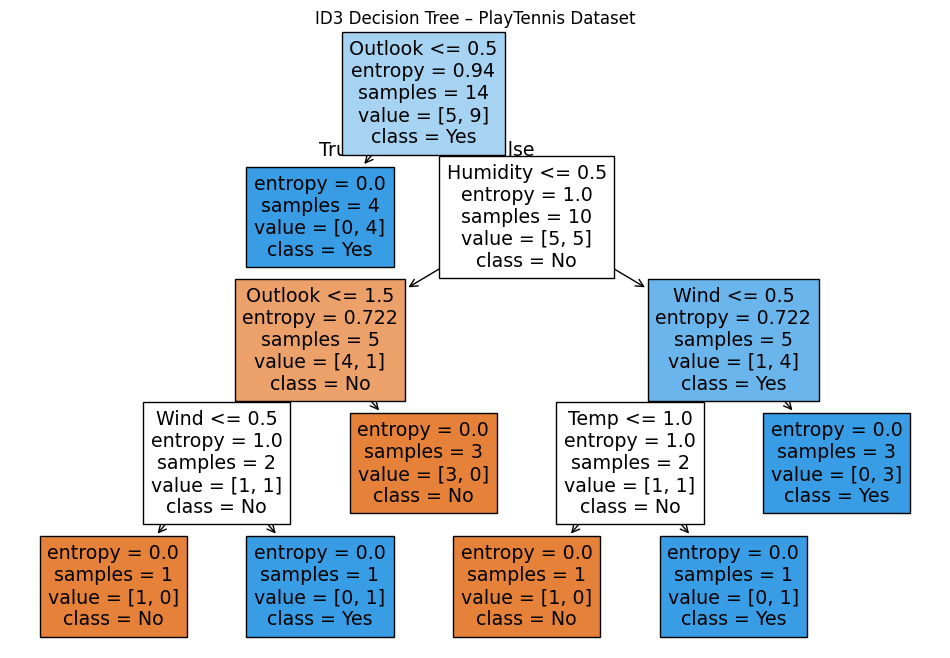

In [9]:
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoders["PlayTennis"].classes_,
          filled=True)
plt.title("ID3 Decision Tree – PlayTennis Dataset")
plt.show()


In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [11]:
data = {
    "Outlook": ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast",
                "Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp": ["Hot","Hot","Hot","Mild","Cool","Cool","Cool",
             "Mild","Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity": ["High","High","High","High","Normal","Normal","Normal",
                 "High","Normal","Normal","Normal","High","Normal","High"],
    "Wind": ["Weak","Strong","Weak","Weak","Weak","Strong","Strong",
             "Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "Golf Players": [25,30,46,45,52,23,43,35,38,46,48,52,44,30]
}

df = pd.DataFrame(data)


In [12]:
label_encoders = {}

for column in ["Outlook", "Temp", "Humidity", "Wind"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [13]:
X = df[["Outlook", "Temp", "Humidity", "Wind"]]
y = df["Golf Players"]


In [14]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [15]:
new_sample = pd.DataFrame({
    "Outlook": [label_encoders["Outlook"].transform(["Rain"])[0]],
    "Temp": [label_encoders["Temp"].transform(["Mild"])[0]],
    "Humidity": [label_encoders["Humidity"].transform(["Normal"])[0]],
    "Wind": [label_encoders["Wind"].transform(["Weak"])[0]]
})

prediction = model.predict(new_sample)

print("Predicted Golf Players:", prediction[0])


Predicted Golf Players: 46.0


In [17]:
prediction = model.predict(new_sample)
print("Predicted number of Golf Players:", prediction[0])

Predicted number of Golf Players: 46.0


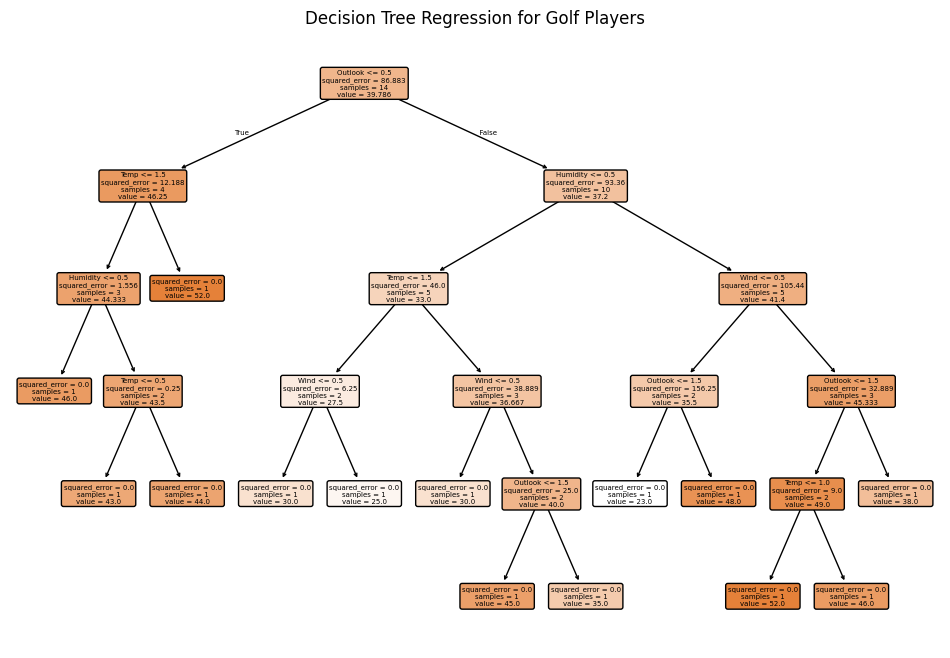

In [18]:
# Step 7: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.title("Decision Tree Regression for Golf Players")
plt.show()

In [19]:
# Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Iris data set.csv to Iris data set (1).csv


In [21]:
# Column names as per UCI IRIS dataset
columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]

In [22]:
# Load the IRIS Dataset (NO HEADER in iris.data)
data = pd.read_csv("Iris data set.csv", header=None, names=columns)

In [23]:
# Remove possible empty rows (sometimes last line is blank)
data.dropna(inplace=True)

In [24]:
# Features and target
X = data.drop("species", axis=1)
y = data["species"]

print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (151, 5)
     sepal_length   sepal_width   petal_length   petal_width      species
Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa


In [25]:
print(y.value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Species             1
Name: count, dtype: int64


In [26]:
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (151, 5)
     sepal_length   sepal_width   petal_length   petal_width      species
Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa


In [28]:
# Train–Test Split
# Filter out the problematic row where the index is 'Id' (the incorrectly parsed header)
X_filtered = X[X.index != 'Id']
y_filtered = y[y.index != 'Id']

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.25,
    random_state=42,
    stratify=y_filtered
)

In [29]:
# ---------------- Naïve Bayes ----------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naïve Bayes Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


=== Naïve Bayes Classifier ===
Accuracy: 0.9210526315789473

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [30]:
# ---------------- Decision Tree ----------------
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

In [31]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

=== Decision Tree Classifier ===
Accuracy: 0.9210526315789473

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [32]:
# ---------------- Model Comparison ----------------
print("Model Comparison")
print("----------------")
print(f"Naïve Bayes Accuracy    : {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Decision Tree Accuracy : {accuracy_score(y_test, y_pred_dt):.4f}")

Model Comparison
----------------
Naïve Bayes Accuracy    : 0.9211
Decision Tree Accuracy : 0.9211
